MULTILABEL CLASSIFICATION OF VACCINE

In [530]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD TRAINING DATA

In [531]:
df=pd.read_csv('training_set_features.csv')
y=pd.read_csv('training_set_labels.csv')


In [532]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [533]:
y.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [534]:
df = df.merge(y, how='left', on='respondent_id')
df.shape[0]

26707

In [535]:
df_test=pd.read_csv('test_set_features.csv')

EDA AND HANDLING NULL/MISSING VALUES 

In [536]:
df.isnull().sum().sort_values(ascending=False) #features with their corresponding  missing values

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_xyz_sick_from_vacc       395
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
xyz_knowledge                    116
xyz_concern                       92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [537]:
df[[i for i in df.columns if df[i].dtype=='object']].describe()  # non-numerical features

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


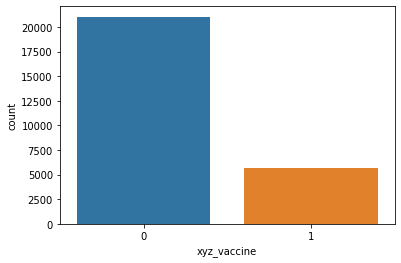

In [538]:
sns.countplot(x='xyz_vaccine',data=df)  
plt.show()

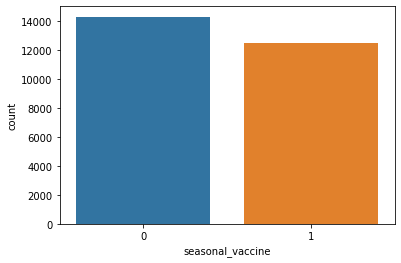

In [539]:
sns.countplot(x='seasonal_vaccine',data=df)   
plt.show()

In [540]:
df[['xyz_vaccine','seasonal_vaccine']].corr()  # correlation b/w labels 

,xyz_vaccine,seasonal_vaccine
xyz_vaccine,1.000000,0.377143
seasonal_vaccine,0.377143,1.000000


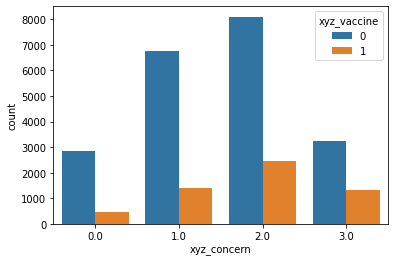

In [541]:
sns.countplot(x='xyz_concern',data=df,hue='xyz_vaccine') #0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned
plt.show()
df['xyz_concern'].fillna(df['xyz_concern'].mode()[0], inplace = True)
df_test['xyz_concern'].fillna(df_test['xyz_concern'].mode()[0], inplace = True)

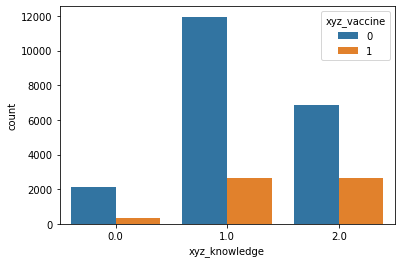

In [542]:
sns.countplot(x='xyz_knowledge',data=df,hue='xyz_vaccine')
plt.show()
df['xyz_knowledge'].fillna(df['xyz_knowledge'].mode()[0], inplace = True)
df_test['xyz_knowledge'].fillna(df_test['xyz_knowledge'].mode()[0], inplace = True)

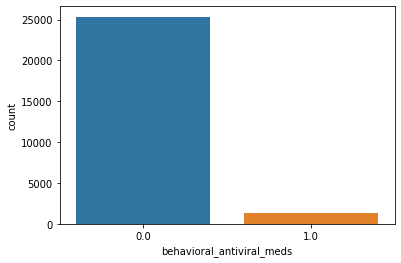

In [543]:
sns.countplot(x='behavioral_antiviral_meds',data=df)
plt.show()
df['behavioral_antiviral_meds'].fillna(df['behavioral_antiviral_meds'].mode()[0], inplace = True)
df_test['behavioral_antiviral_meds'].fillna(df_test['behavioral_antiviral_meds'].mode()[0], inplace = True)

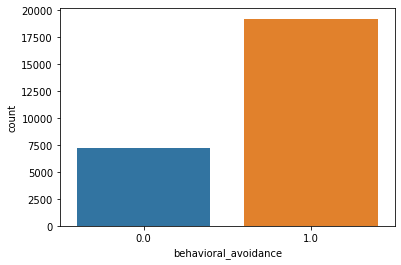

In [544]:
sns.countplot(x='behavioral_avoidance',data=df)
plt.show()
df['behavioral_avoidance'].fillna(df['behavioral_avoidance'].mode()[0], inplace = True)
df_test['behavioral_avoidance'].fillna(df_test['behavioral_avoidance'].mode()[0], inplace = True)

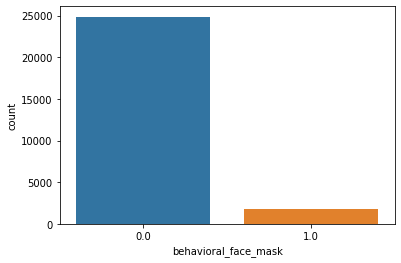

In [545]:
sns.countplot(x='behavioral_face_mask',data=df)
plt.show()
df['behavioral_face_mask'].fillna(df['behavioral_face_mask'].mode()[0], inplace = True)
df_test['behavioral_face_mask'].fillna(df_test['behavioral_face_mask'].mode()[0], inplace = True)

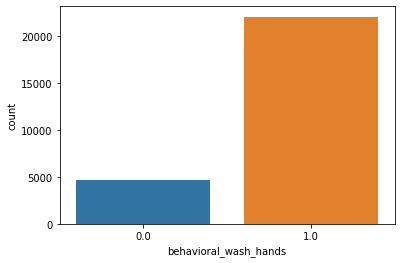

In [546]:
sns.countplot(x='behavioral_wash_hands',data=df)
plt.show()
df['behavioral_wash_hands'].fillna(df['behavioral_wash_hands'].mode()[0], inplace = True)
df_test['behavioral_wash_hands'].fillna(df_test['behavioral_wash_hands'].mode()[0], inplace = True)

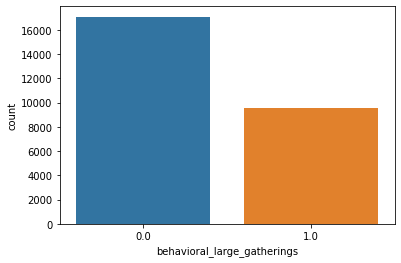

In [547]:
sns.countplot(x='behavioral_large_gatherings',data=df)
plt.show()
df['behavioral_large_gatherings'].fillna(df['behavioral_large_gatherings'].mode()[0], inplace = True)
df_test['behavioral_large_gatherings'].fillna(df_test['behavioral_large_gatherings'].mode()[0], inplace = True)

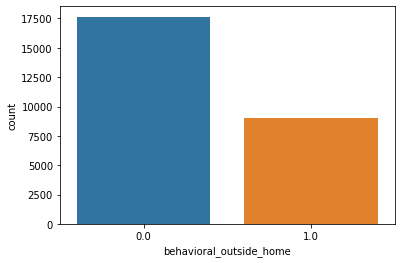

In [548]:
sns.countplot(x='behavioral_outside_home',data=df)
plt.show()
df['behavioral_outside_home'].fillna(df['behavioral_outside_home'].mode()[0], inplace = True)
df_test['behavioral_outside_home'].fillna(df_test['behavioral_outside_home'].mode()[0], inplace = True)

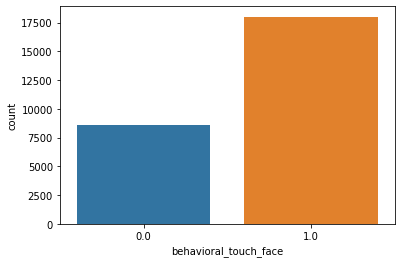

In [549]:
sns.countplot(x='behavioral_touch_face',data=df)
plt.show()
df['behavioral_touch_face'].fillna(df['behavioral_touch_face'].mode()[0], inplace = True)
df_test['behavioral_touch_face'].fillna(df_test['behavioral_touch_face'].mode()[0], inplace = True)

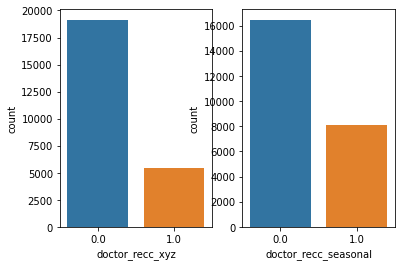

In [550]:
plt.subplot(121)
sns.countplot(x='doctor_recc_xyz',data=df)
plt.subplot(122)
sns.countplot(x='doctor_recc_seasonal',data=df)
plt.show()
df['doctor_recc_xyz'].fillna(df['doctor_recc_xyz'].mode()[0], inplace = True)
df['doctor_recc_seasonal'].fillna(df['doctor_recc_seasonal'].mode()[0], inplace = True)

df_test['doctor_recc_xyz'].fillna(df_test['doctor_recc_xyz'].mode()[0], inplace = True)
df_test['doctor_recc_seasonal'].fillna(df_test['doctor_recc_seasonal'].mode()[0], inplace = True)

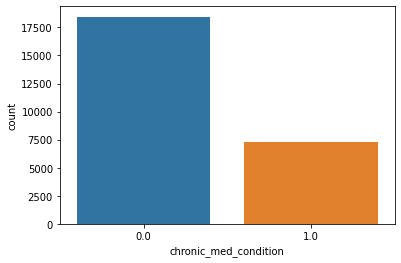

In [551]:
sns.countplot(x='chronic_med_condition',data=df)
plt.show()
df['chronic_med_condition'].fillna(df['chronic_med_condition'].mode()[0], inplace = True)
df_test['chronic_med_condition'].fillna(df_test['chronic_med_condition'].mode()[0], inplace = True)

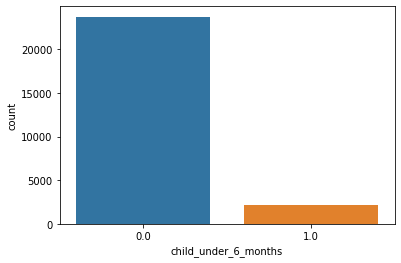

In [552]:
sns.countplot(x='child_under_6_months',data=df)
plt.show()
df['child_under_6_months'].fillna(df['child_under_6_months'].mode()[0], inplace = True)
df_test['child_under_6_months'].fillna(df_test['child_under_6_months'].mode()[0], inplace = True)

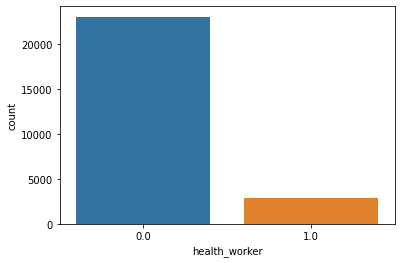

In [553]:
sns.countplot(x='health_worker',data=df)
plt.show()
df['health_worker'].fillna(df['health_worker'].mode()[0], inplace = True)
df_test['health_worker'].fillna(df_test['health_worker'].mode()[0], inplace = True)

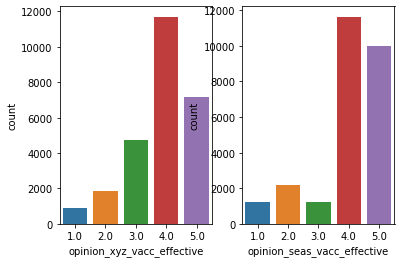

In [554]:
plt.subplot(121)
sns.countplot(x='opinion_xyz_vacc_effective',data=df)
plt.subplot(122)
sns.countplot(x='opinion_seas_vacc_effective',data=df)
plt.show()
df['opinion_xyz_vacc_effective'].fillna(df['opinion_xyz_vacc_effective'].mode()[0], inplace = True)
df['opinion_seas_vacc_effective'].fillna(df['opinion_seas_vacc_effective'].mode()[0], inplace = True)

df_test['opinion_xyz_vacc_effective'].fillna(df_test['opinion_xyz_vacc_effective'].mode()[0], inplace = True)
df_test['opinion_seas_vacc_effective'].fillna(df_test['opinion_seas_vacc_effective'].mode()[0], inplace = True)

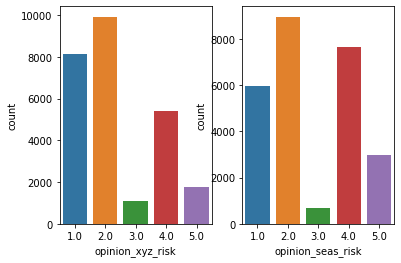

In [555]:
plt.subplot(121)
sns.countplot(x='opinion_xyz_risk',data=df)
plt.subplot(122)
sns.countplot(x='opinion_seas_risk',data=df)
plt.show()
df['opinion_xyz_risk'].fillna(df['opinion_xyz_risk'].mode()[0], inplace = True)
df['opinion_seas_risk'].fillna(df['opinion_seas_risk'].mode()[0], inplace = True)

df_test['opinion_xyz_risk'].fillna(df_test['opinion_xyz_risk'].mode()[0], inplace = True)
df_test['opinion_seas_risk'].fillna(df_test['opinion_seas_risk'].mode()[0], inplace = True)


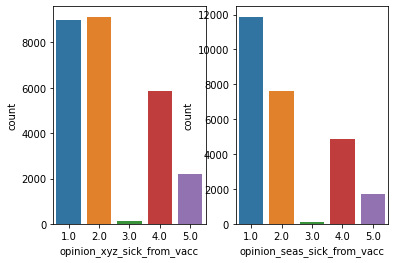

In [556]:
plt.subplot(121)
sns.countplot(x='opinion_xyz_sick_from_vacc',data=df)
plt.subplot(122)
sns.countplot(x='opinion_seas_sick_from_vacc',data=df)
plt.show()
df['opinion_xyz_sick_from_vacc'].fillna(df['opinion_xyz_sick_from_vacc'].mode()[0], inplace = True)
df['opinion_seas_sick_from_vacc'].fillna(df['opinion_seas_sick_from_vacc'].mode()[0], inplace = True)

df_test['opinion_xyz_sick_from_vacc'].fillna(df_test['opinion_xyz_sick_from_vacc'].mode()[0], inplace = True)
df_test['opinion_seas_sick_from_vacc'].fillna(df_test['opinion_seas_sick_from_vacc'].mode()[0], inplace = True)

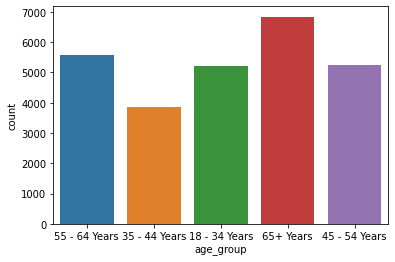

In [557]:
sns.countplot(x='age_group',data=df)
plt.show()


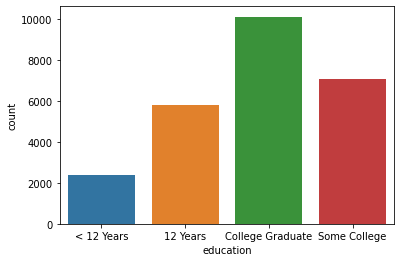

In [558]:
sns.countplot(x='education',data=df)
plt.show()
df['education'].fillna(df['education'].mode()[0], inplace = True)
df_test['education'].fillna(df_test['education'].mode()[0], inplace = True)

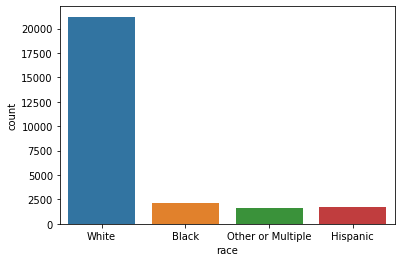

In [559]:
sns.countplot(x='race',data=df)
plt.show()

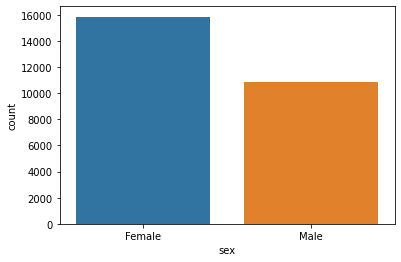

In [560]:
sns.countplot(x='sex',data=df)
plt.show()

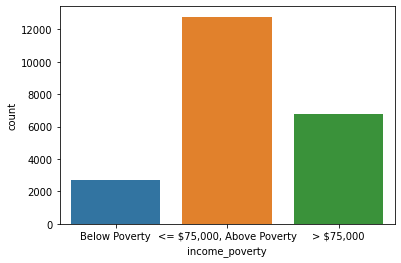

In [561]:
sns.countplot(x='income_poverty',data=df)
plt.show()
df['income_poverty'].fillna(df['income_poverty'].mode()[0], inplace = True)
df_test['income_poverty'].fillna(df_test['income_poverty'].mode()[0], inplace = True)

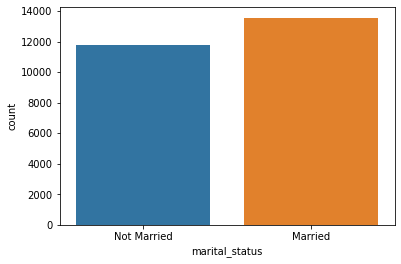

In [562]:
sns.countplot(x='marital_status',data=df)
plt.show()
df['marital_status'].fillna(df['marital_status'].mode()[0], inplace = True)
df_test['marital_status'].fillna(df_test['marital_status'].mode()[0], inplace = True)

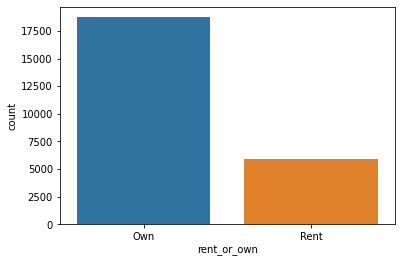

In [563]:
sns.countplot(x='rent_or_own',data=df)
plt.show()
df['rent_or_own'].fillna(df['rent_or_own'].mode()[0], inplace = True)
df_test['rent_or_own'].fillna(df_test['rent_or_own'].mode()[0], inplace = True)

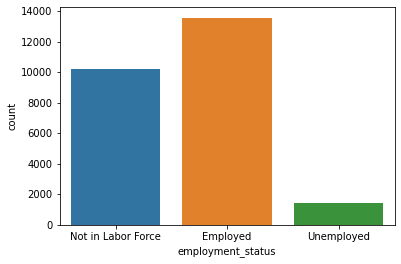

In [564]:
sns.countplot(x='employment_status',data=df)
plt.show()
df['employment_status'].fillna(df['employment_status'].mode()[0], inplace = True)
df_test['employment_status'].fillna(df_test['employment_status'].mode()[0], inplace = True)

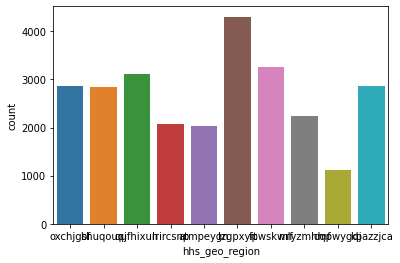

In [565]:
sns.countplot(x='hhs_geo_region',data=df)
plt.show()

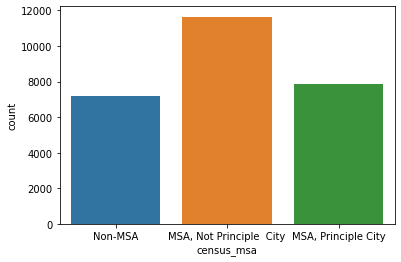

In [566]:
sns.countplot(x='census_msa',data=df)
plt.show()

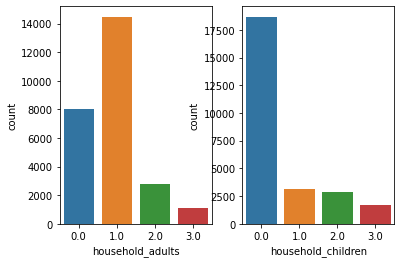

In [567]:
plt.subplot(121)
sns.countplot(x='household_adults',data=df)
plt.subplot(122)
sns.countplot(x='household_children',data=df)
plt.show()
df['household_adults'].fillna(df['household_adults'].mode()[0], inplace = True)
df['household_children'].fillna(df['household_children'].mode()[0], inplace = True)

df_test['household_adults'].fillna(df_test['household_adults'].mode()[0], inplace = True)
df_test['household_children'].fillna(df_test['household_children'].mode()[0], inplace = True)

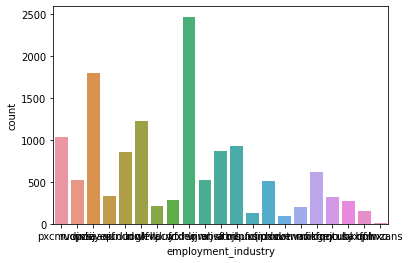

In [568]:
sns.countplot(x='employment_industry',data=df)
plt.show()


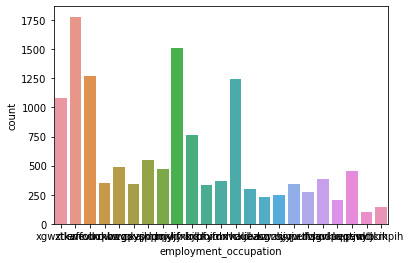

In [569]:
sns.countplot(x='employment_occupation',data=df)
plt.show()

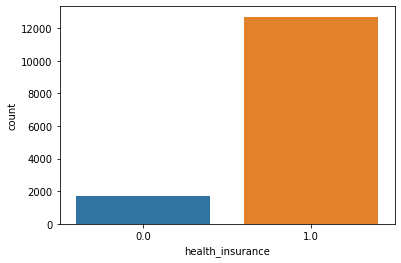

In [570]:
sns.countplot(x='health_insurance',data=df)
plt.show()
df['health_insurance'].fillna(df['health_insurance'].mode()[0], inplace = True)
df_test['health_insurance'].fillna(df_test['health_insurance'].mode()[0], inplace = True)

In [571]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
imputer = KNNImputer(n_neighbors=5)
le = LabelEncoder()
df['age_group']=le.fit_transform(df.age_group)
df['education']=le.fit_transform(df.education)
df['race']=le.fit_transform(df.race)
df['sex']=le.fit_transform(df.sex)
df['income_poverty']=le.fit_transform(df.income_poverty)
df['rent_or_own']=le.fit_transform(df.rent_or_own)
df['employment_status']=le.fit_transform(df.employment_status)
df['census_msa']=le.fit_transform(df.census_msa)
df['hhs_geo_region']=le.fit_transform(df.hhs_geo_region)
df['marital_status']=le.fit_transform(df.marital_status)
df['employment_industry']=le.fit_transform(df.employment_industry)
df['employment_occupation']=le.fit_transform(df.employment_occupation)



In [572]:
df_test['age_group']=le.fit_transform(df_test.age_group)
df_test['education']=le.fit_transform(df_test.education)
df_test['race']=le.fit_transform(df_test.race)
df_test['sex']=le.fit_transform(df_test.sex)
df_test['income_poverty']=le.fit_transform(df_test.income_poverty)
df_test['rent_or_own']=le.fit_transform(df_test.rent_or_own)
df_test['employment_status']=le.fit_transform(df_test.employment_status)
df_test['census_msa']=le.fit_transform(df_test.census_msa)
df_test['hhs_geo_region']=le.fit_transform(df_test.hhs_geo_region)
df_test['marital_status']=le.fit_transform(df_test.marital_status)
df_test['employment_industry']=le.fit_transform(df_test.employment_industry)
df_test['employment_occupation']=le.fit_transform(df_test.employment_occupation)

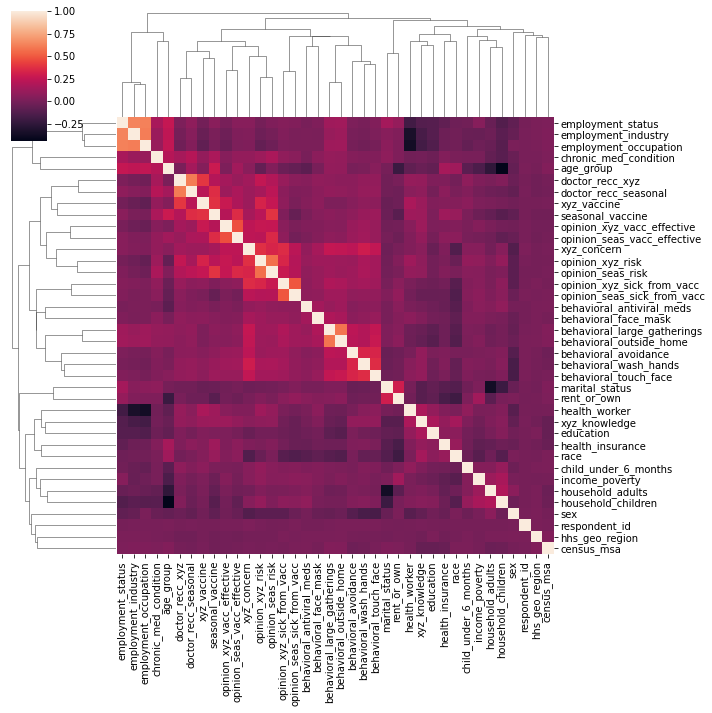

In [573]:
sns.clustermap(df.corr())
plt.show()

FEATURE ENGINEERING

In [574]:
df.drop(['respondent_id','xyz_vaccine','seasonal_vaccine'],axis=1,inplace=True)
len(list(df.columns))

35

In [575]:
y.drop('respondent_id',axis=1,inplace=True)

MODEL

In [576]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve,roc_auc_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [577]:
from sklearn.model_selection import train_test_split
X_train_xyz, X_test_xyz, y_train_xyz, y_test_xyz = train_test_split( df, y['xyz_vaccine'], test_size=0.3, random_state=42,shuffle=True, stratify=y)
X_train_sea, X_test_sea, y_train_sea, y_test_sea = train_test_split( df, y['seasonal_vaccine'], test_size=0.3, random_state=42,shuffle=True, stratify=y)

c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


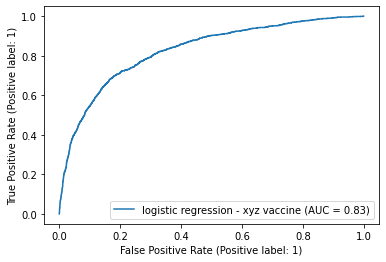

0.6783106865244334

In [640]:
model_1 = make_pipeline(
    LogisticRegression(solver='sag')
)
model_1.fit(X_train_xyz, y_train_xyz)
plot_roc_curve(model_1, X_test_xyz, y_test_xyz, name='logistic regression - xyz vaccine')
plt.show()

c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


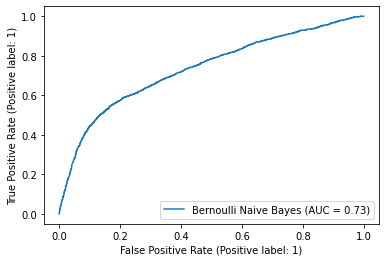

In [593]:
model_2 = make_pipeline(
       BernoulliNB()
)

model_2.fit(X_train_xyz, y_train_xyz)


plot_roc_curve(model_2, X_test_xyz, y_test_xyz, name='Bernoulli Naive Bayes')
plt.show()

c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


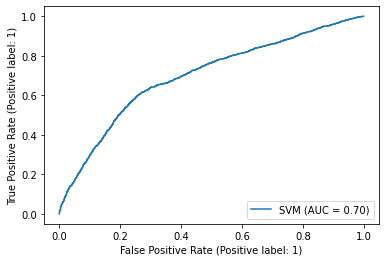

In [594]:
model_3 = make_pipeline(
       SVC(kernel="rbf", gamma=0.5, C=1.0)
)

model_3.fit(X_train_xyz, y_train_xyz)

plot_roc_curve(model_3, X_test_xyz, y_test_xyz, name='SVM')
plt.show()

c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


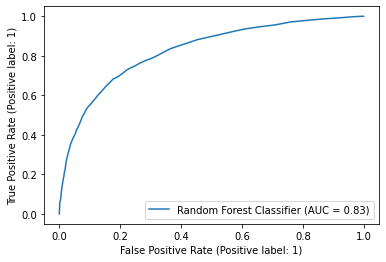

In [595]:

model_4 = make_pipeline(
RandomForestClassifier(criterion='log_loss')
)

model_4.fit(X_train_xyz, y_train_xyz)

plot_roc_curve(model_4, X_test_xyz, y_test_xyz, name='Random Forest Classifier')
plt.show()


c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


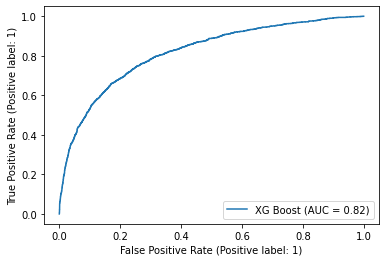

In [596]:
model_5 = make_pipeline(
    XGBClassifier()
)

model_5.fit(X_train_xyz, y_train_xyz)

plot_roc_curve(model_5, X_test_xyz, y_test_xyz, name='XG Boost')
plt.show()

PREDICTION ON TEST DATA

In [584]:
id=df_test['respondent_id']
df_test.drop(['respondent_id'],axis=1,inplace=True)
len(df_test.columns)


35

In [634]:
#model_4 = Random Forest has good AUC Value so we can use for our final prediction
model_4.fit(X_train_xyz, y_train_xyz)
y_pred_xyz=model_4.predict_proba(df_test)

model_4.fit(X_train_sea, y_train_sea)
y_pred_seasonal=model_4.predict_proba(df_test)

In [635]:
id=pd.Series(range(26707,53414))
y_pred_xyz = pd.Series(y_pred_xyz[:,1])  #probability of receiving xyz/h1n1 vaccine
y_pred_seasonal = pd.Series(y_pred_seasonal[:,1]) #probability of receiving seasonal vaccine

target1='h1n1_vaccine'
target2='seasonal_vaccine'

submission = pd.concat([id, y_pred_xyz,y_pred_seasonal], axis=1)

submission.rename(columns={0:'respondent_id', 1:target1,2:target2}, inplace=True)

# Export the dataset to a *csv* file.
submission.to_csv("./submission.csv",index=False)